In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [9]:
image = mx.image.imread('dog.jpg')

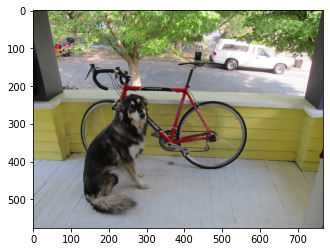

In [3]:
plt.imshow(image.asnumpy())

In [10]:
image.dtype, image.shape, image.min().asscalar(), image.max().asscalar()

(numpy.uint8, (576, 768, 3), 0, 255)

In [5]:
#There are no preset transform for the dataset or the model we are trying to use #
from mxnet.gluon.data.vision import transforms
transform_fn = transforms.Compose([ ## 2 transforms applied one after the other 
    transforms.ToTensor(),#hwc to chw. Data converted from 8 bit int to 32 bit float
    transforms.Normalize([.485,.456,.406],[.229,.224,225]) #normalize values of the image using
])

In [11]:
image = transform_fn(image)
image.dtype, image.shape, image.min().asscalar(), image.max().asscalar()

(numpy.float32, (3, 576, 768), -2.117904, 2.4285715)

In [12]:
##Now create batch of a single image
image = image.expand_dims(0) # 0 ==> new dim added as first dimension
image.shape

(1, 3, 576, 768)

In [13]:
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained=True)

In [14]:
output = network.demo(image)

C:\ProgramData\Anaconda3\lib\site-packages\gluoncv\model_zoo\segbase.py:102: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [15]:
output.shape

(1, 150, 576, 768)

In [16]:
output = output[0]

In [17]:
#output #CHW, 150 channels
#random pick

px_ht, px_wd = 300, 500
px_logit = output[:, px_ht, px_wd]

In [18]:
px_prob = mx.nd.softmax(px_logit)
px_rounded_prob = mx.nd.round(px_prob*100)/100
print(px_rounded_prob)


[0.85 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.09 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [19]:
class_idx = mx.nd.argmax(px_logit, axis = 0)
class_idx = class_idx[0].astype('int').asscalar()
print(class_idx)

0


In [23]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

class_label = list(ADE20KSegmentation.CLASSES)[class_idx]

print(class_label)

wall


In [24]:

px_ht, px_wd = 200, 400
px_logit = output[:, px_ht, px_wd]

In [25]:
px_prob = mx.nd.softmax(px_logit)
px_rounded_prob = mx.nd.round(px_prob*100)/100
print(px_rounded_prob)


[0.13 0.01 0.01 0.17 0.01 0.07 0.   0.   0.   0.1  0.   0.   0.01 0.15
 0.   0.   0.   0.   0.   0.   0.01 0.05 0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.   0.02 0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.   0.   0.   0.03 0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.01 0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [26]:
class_idx = mx.nd.argmax(px_logit, axis = 0)
class_idx = class_idx[0].astype('int').asscalar()
print(class_idx)

3


In [27]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

class_label = list(ADE20KSegmentation.CLASSES)[class_idx]

print(class_label)

floor, flooring


In [28]:
#By specifying axis =0, apply softmax independently for all pixels
output_prob = mx.nd.softmax(output, axis = 0)

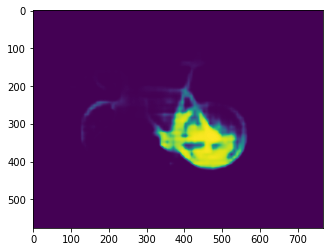

In [29]:
#output is prob dist across classes

output_heatmap = output_prob[127]
plt.imshow(output_heatmap.asnumpy())

In [30]:
#visualize most likely class
prediction = mx.nd.argmax(output, 0).asnumpy()
prediction.shape

(576, 768)

In [31]:
prediction

array([[0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       ...,
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.]], dtype=float32)

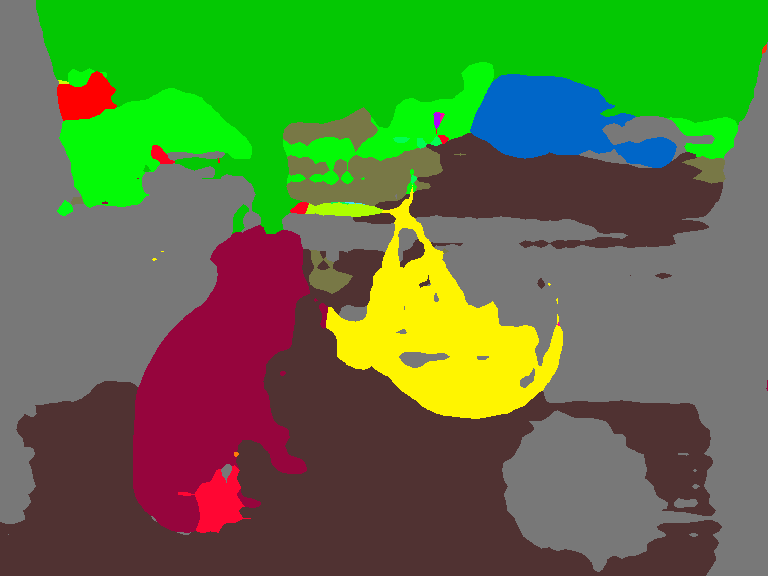

In [35]:
#Map diff class to diff color in RGB space

from gluoncv.utils.viz import get_color_pallete

prediction_img = get_color_pallete(prediction, 'ade20k')
prediction_img